In [1]:
cd Measurement-automation/

/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.patches as patches
from matplotlib import ticker, colorbar as clb

%cd .. 
from parula import *
%cd Measurement-automation/

from importlib import reload
from resonator_tools.circuit import notch_port

import scipy
from scipy.signal import correlate, find_peaks
from scipy.optimize import *

rc("font", **{"size":14})

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

%load_ext snakeviz

import lib2

from lib2.MeasurementResult import *

/home/gleb/Документы/Science/Статьи/Machine vision
/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [4]:
# reload(lib2.ResonatorDetector)
# reload(lib2.fulaut.AnticrossingOracle)
from lib2.fulaut.AnticrossingOracle import AnticrossingOracle

In [5]:
# reload(lib2.fulaut.SpectrumOracle)
from lib2.fulaut.SpectrumOracle import *

In [21]:
samples = {"Xmon MIPT Al asym anneal":
               {"II":[[1,3], [[3], [5]]],
                "III":[[2], [3, 4]],
                "VI":[[0,1], [[0, 3], [8]]]},
           "BMSTU Clean 3":
               {"I":[[0], [0]]},
           "Xmon BMSTU 1806-176-1":
               {"I":[[1], [8]],
                "II":[[0], [1]],
                "VI":[[3], [7]]},
           "Xmon-043-3":
               {"II":[[0], [0]],
                "VI":[[0], [0]]},
           "Xmon 258 Si 111":
               {"I":[[0],[0]],
                "V":[[0],[1]]},
           "Xmon BMSTU assym 1804-108-2":
               {"V":[[0],[0]]},
#            "Xmon MIPT Al asym NO anneal":
#                {"VI":[[1],[1]]}
          }

In [ ]:
for sample_name, measurements in samples.items():
#     if sample_name != "Xmon BMSTU 1806-176-1":
#         continue
    for qubit_name, data_ordinals in measurements.items():
        print(sample_name, qubit_name)

#         if qubit_name is not "VI":
#             continue
            
        for idx, sts_id in enumerate(data_ordinals[0]):
            if len(data_ordinals[0]) > 1:
                two_tone_ids = data_ordinals[1][idx]
            else:
                two_tone_ids = data_ordinals[1]
                
            for two_tone_id in two_tone_ids:
                print(sample_name, qubit_name, sts_id, two_tone_id)
                anti = MeasurementResult.load(sample_name, 
                                              "%s-anticrossing"%qubit_name, 
                                              return_all=True)[sts_id]
                twotone = MeasurementResult.load(sample_name, 
                                                 "%s-two-tone"%qubit_name,
                                                  return_all=True)[two_tone_id]
                
                ao = AnticrossingOracle("transmon", anti, plot=False, fast_res_detect=True, hints=[])
                result = ao.launch()
                if result[0][1] > 70e6 and result[0][3]<3e9:
                    ao = AnticrossingOracle("transmon", anti, plot=False, fast_res_detect=True, hints=["fqmax_above"])
                    result = ao.launch()
                    
                so = SpectrumOracle("transmon", twotone, result[0][2:], plot=True)
                so.launch()
                plt.savefig("../SO test/"+str((sample_name, qubit_name, sts_id, two_tone_id))+".png")

In [30]:
# sample_name = "Xmon BMSTU assym 1804-108-2"
# sample_name = "Xmon MIPT Al asym NO anneal"
sample_name = "Xmon MIPT Al asym anneal"
# sample_name = "BMSTU Clean 3"
# sample_name = "Xmon-043-3"
# sample_name = "Xmon BMSTU 1806-176-1"
qubit_name = "II"
# anti = MeasurementResult.load("Xmon MIPT Al asym anneal", "VI-anticrossing")
# twotone = MeasurementResult.load("Xmon MIPT Al asym anneal", "VI-two-tone")
anti = MeasurementResult.load(sample_name, "%s-anticrossing"%qubit_name)
twotone = MeasurementResult.load(sample_name, "%s-two-tone"%qubit_name)

0 data/Xmon MIPT Al asym anneal/Mar 12 2018/16-32-15 - II-anticrossing/II-anticrossing.pkl
1 data/Xmon MIPT Al asym anneal/Mar 12 2018/16-48-45 - II-anticrossing/II-anticrossing.pkl
2 data/Xmon MIPT Al asym anneal/Mar 28 2018/12-53-05 - II-anticrossing/II-anticrossing.pkl
3 data/Xmon MIPT Al asym anneal/Mar 28 2018/14-25-37 - II-anticrossing/II-anticrossing.pkl
More than one file found. Enter an index from listed above:
1
0 data/Xmon MIPT Al asym anneal/Mar 12 2018/18-15-16 - II-two-tone/II-two-tone.pkl
1 data/Xmon MIPT Al asym anneal/Mar 12 2018/18-33-28 - II-two-tone/II-two-tone.pkl
2 data/Xmon MIPT Al asym anneal/Mar 12 2018/19-29-23 - II-two-tone/II-two-tone.pkl
3 data/Xmon MIPT Al asym anneal/Mar 12 2018/20-59-12 - II-two-tone/II-two-tone.pkl
4 data/Xmon MIPT Al asym anneal/Mar 28 2018/15-18-30 - II-two-tone/II-two-tone.pkl
5 data/Xmon MIPT Al asym anneal/Mar 28 2018/15-55-12 - II-two-tone/II-two-tone.pkl
6 data/Xmon MIPT Al asym anneal/Mar 28 2018/19-37-09 - II-two-tone/II-two-to

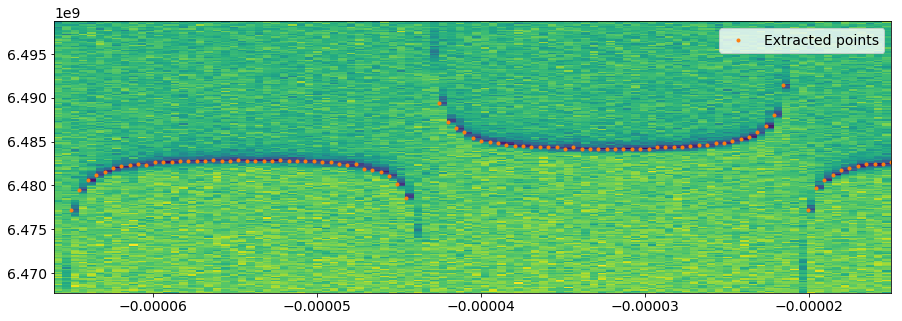

In [31]:
ao = AnticrossingOracle("transmon", anti, plot=True, fast_res_detect=True, hints=[])

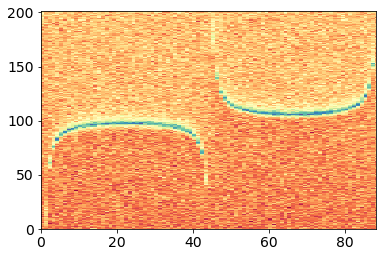

In [43]:
plt.pcolormesh(abs(anti._data["data"]).T, cmap="Spectral_r", rasterized=True)
plt.xlim(0, 88)
plt.savefig("anti.pdf", dpi=300)

6.4839e+09, 3.5140e+07, 4.4860e-05, -9.7818e-06, 7.6924e+09, 5.6698e-02 loss: 0.08 MHz


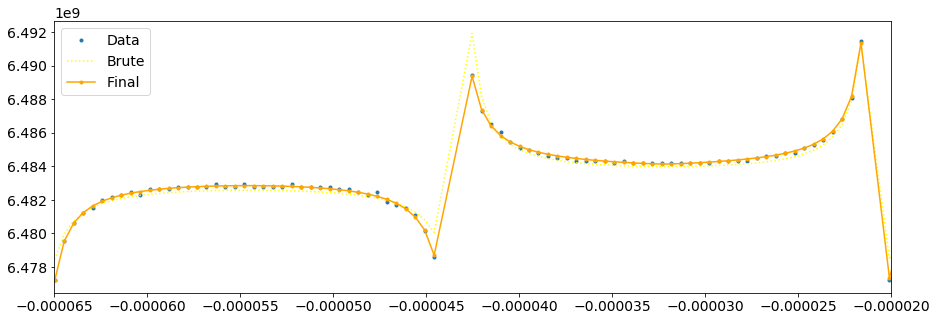

In [47]:
result = ao.launch()
plt.xlim(-65e-6, -20e-6)
plt.savefig("anti_fit.pdf")

'FigureManagerBase' object has no attribute 'window'


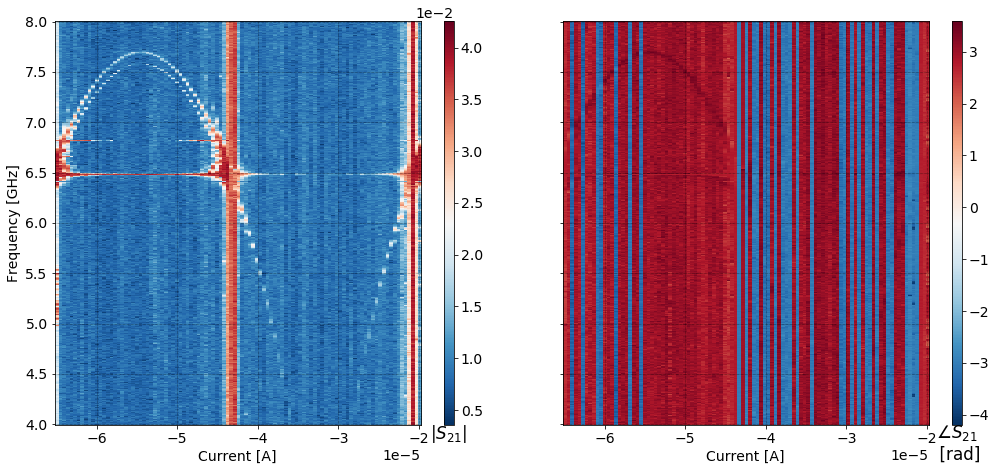

In [33]:
try:
    twotone._amps_map = None
    twotone._phas_map = None
    twotone.visualize()
except Exception as e:
    print(e)
plt.savefig("twotone2.pdf", dpi=300)

In [63]:
reload(lib2.fulaut.SpectrumOracle)
from lib2.fulaut.SpectrumOracle import *

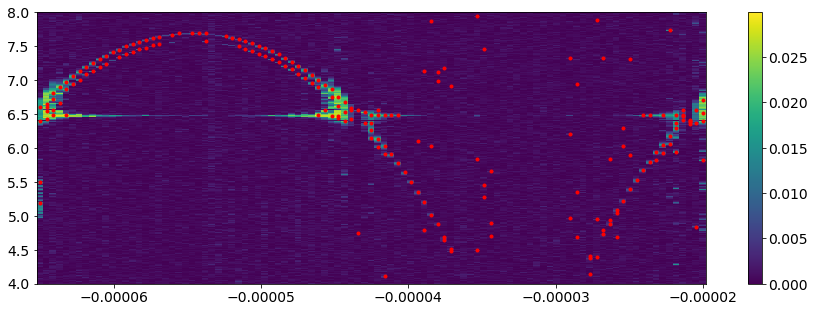

In [68]:
sp = SpectrumOracle("transmon", twotone, result[0][2:], True)
# sp._extract_data(True)

Done: 0.00%, 0/121, [4.481e-05, -5.459e-05, 7.692e+00, 8.465e-02, 1.244e-01]

array([ 4.48113209e-05, -5.45947940e-05,  7.69233736e+09,  8.46458699e-02,
        1.24387359e-01])

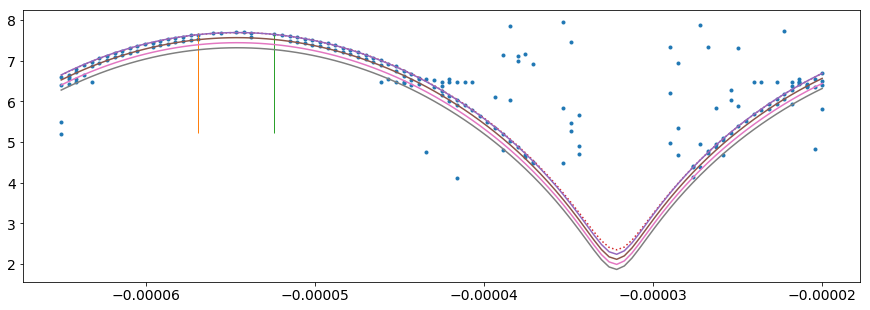

In [69]:
opt_params = sp.launch()
# plt.ylim(5,8)
opt_params
# plt.savefig("twotonefit.pdf")

In [31]:
1/37

0.02702702702702703

In [24]:
sp._coarse_brute_loss

(0.009433962264150943, 0.04029180521915187)

## General two-tone plot

Text(1.1,-1.5,'$|S_{21}|$')

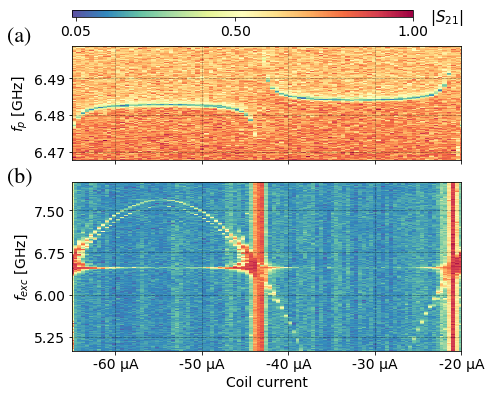

In [54]:

plt.subplot2grid((2,1), (0,0))

curs_sts, S21s_sts, freqs_sts  = anti.get_data().values()

m1 = pcolormesh(curs_sts/1e-6, freqs_sts/1e9, abs(S21s_sts.T)/np.max(abs(S21s_sts)),
                cmap="Spectral_r", rasterized=True)
ax1 = gca()

plt.xlim(-65, -20)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))


gca().set_xticklabels([])
plt.ylabel("$f_{p}$ [GHz]")

plt.text(-72.5, 6.5, "(a)", fontdict={"name":"STIX"}, fontsize=22)

plt.grid()

plt.subplot2grid((2,1), (1,0))

curs, freqs, S21s = twotone.get_data().values()

dx = curs[1]-curs[0]
x = concatenate((curs-dx/2, [curs[-1]+dx/2]))
dy = freqs[1]-freqs[0]
y = concatenate((freqs-dy/2, [freqs[-1]+dx/2]))

pcolormesh(x, y/1e9, abs(S21s).T/np.max(abs(S21s)), cmap="Spectral_r", rasterized=True)

plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10e-6))
plt.xlim(-65e-6, -20e-6)
plt.xlabel("Coil current")

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.75))
plt.ylim(5, 8)
plt.ylabel("$f_{exc}$ [GHz]")

plt.grid()

plt.text(-72.5e-6, 8, "(b)", fontdict={"name":"STIX"}, fontsize=22)


plt.gcf().set_size_inches(7,6)

plt.tight_layout()

caxes = clb.make_axes(ax1, location="top", shrink=0.875, aspect=50, pad=0.175, anchor=(0,0))[0]
# plt.colorbar(cax = caxes)
cb = plt.colorbar(m1, orientation="horizontal", cax=caxes)
loc = ticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
cb.locator = loc
cb.set_ticks([0.05, 0.5, 1])
cb.update_ticks()
cb.ax.set_title(r"$|S_{21}|$", position=(1.1,-1.5), fontsize=15)

# plt.savefig("../Pictures/twotone.pdf", bbox_inches="tight", dpi=300)

## Point extraction

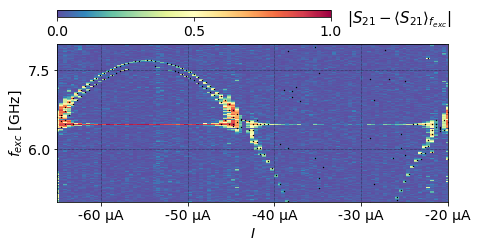

In [65]:
sp = SpectrumOracle("transmon", twotone, result[0][2:], False)

curs, freqs, S21s = twotone.get_data().values()

dx = curs[1]-curs[0]
x = concatenate((curs-dx/2, [curs[-1]+dx/2]))
dy = freqs[1]-freqs[0]
y = concatenate((freqs-dy/2, [freqs[-1]+dx/2]))

pcolormesh(x, y/1e9, abs(sp._Z.T)/np.max(abs(sp._Z)), cmap="Spectral_r", rasterized=True, vmin=0)

plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10e-6))
plt.xlim(-65e-6, -20e-6)
plt.xlabel("$I$")

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1.5))
plt.ylim(5, 8)
plt.ylabel("$f_{exc}$ [GHz]")

plt.grid()

plt.plot(sp._points[:,0], sp._points[:,1], linestyle="", ms=1, color="black", marker="x", markeredgewidth=0.75)

plt.gcf().set_size_inches(7,4)

caxes = clb.make_axes(gca(), location="top", shrink=0.7, aspect=40, pad=0.125, anchor=(0,0))[0]
# plt.colorbar(cax = caxes)
cb = plt.colorbar(orientation="horizontal", cax=caxes)
loc = ticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
cb.locator = loc
cb.update_ticks()
cb.ax.set_title(r"$|S_{21} - \langle S_{21}\rangle_{f_{exc}}|$", position=(1.25,-1.75), fontsize=15)

plt.savefig("../Pictures/extract_points.pdf", bbox_inches="tight", dpi=300)


In [ ]:
mgrid[sp._slices[1]]

In [ ]:
sp._final_loss

In [ ]:
mgrid[sp._slices[3]]

In [ ]:
mgrid[sp._slices[2]]

In [ ]:
sp._fine_slices

In [ ]:
sp._opt_params_coarse

In [ ]:
sp._thresh

In [ ]:
list(zip(sp._candidate_ds, sp._candidate_freqs, sp._candidate_losses))

In [ ]:
sp._coarse_frequency

In [ ]:
sp._refine_freq_slice

In [ ]:
sp._fine_slices

In [ ]:
sp._y_scan_area_size

In [ ]:
params = array([1.60498371e-02, 3.87e-03, 6.22, .0,
       4.75000000e-02])
params = array([1.60498371e-02, 3.65294067e-03, 6.24268538, 3.20312500e-01,
       5.00000000e-02])
params = sp._fine_opt_params.copy()
params[2] = params[2]/1e9
params[1] = result[0][3]
params[0] = result[0][2]
params[-2] = 0

In [ ]:
params

In [ ]:
q_freqs = sp._qubit_spectrum(sp._points[:,0], *params[:4])
distances = abs(q_freqs - sp._points[:,1])

In [ ]:
sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, False)

In [ ]:
loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)

In [ ]:
def _scalarfunc(*params):
    params = asarray(params).flatten()
    return p._cost_function_fine_fast((params, *args))

In [ ]:
scalarfunc = lambda a,b,c,d, e : s(a,b,c,d,e)
vectorize(scalarfunc)(*opt_params[2])

In [ ]:
len(chosen), len(chosen2), len(sp._parameter_values)

In [ ]:
51*0.8

In [ ]:
sp._counter = 0
sp._iterations = 1 
# sp._coarse_frequency = params[2]
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1]))
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1])
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1]*2)
plt.scatter(sp._points[:,0], sp._points[:,1], s=1, color="black")
loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine(params, sp._y_scan_area_size, sp._points, True)
# loss, chosen = sp._cost_function_coarse(params[1:], sp._y_scan_area_size, sp._points, True)


plt.scatter(chosen[:,0], chosen[:,1], s=2)
plt.scatter(chosen2[:,0], chosen2[:,1], s=2, color="C1")

plt.scatter(chosen3[:,0], chosen3[:,1], s=2, color="C2")

plt.title("Loss %.2e"%loss+", chosen %.2f points"%(len(chosen)+len(chosen2)+len(chosen3)))
plt.gcf().set_size_inches(15,10)
# plt.ylim(6.5, 7)
plt.grid()

In [ ]:
sp._counter = 0
sp._iterations = 1 
# sp._coarse_frequency = params[2]
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1]))
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1])
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1]*2)
plt.scatter(sp._points[:,0], sp._points[:,1], s=1, color="black")
loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine(params, sp._y_scan_area_size, sp._points, True)
# loss, chosen = sp._cost_function_coarse(params[1:], sp._y_scan_area_size, sp._points, True)


plt.scatter(chosen[:,0], chosen[:,1], s=2)
plt.scatter(chosen2[:,0], chosen2[:,1], s=2, color="C1")

plt.scatter(chosen3[:,0], chosen3[:,1], s=2, color="C2")

plt.title("Loss %.2e"%loss+", chosen %.2f points"%(len(chosen)+len(chosen2)+len(chosen3)))
plt.gcf().set_size_inches(15,10)
# plt.ylim(6.5, 7)
plt.grid()

In [ ]:
len(chosen)

In [ ]:
sp._counter = 0
sp._iterations = 1 
# sp._coarse_frequency = params[2]
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1]))
# plt.plot(sp._parameter_values,
#                         sp._qubit_spectrum(sp._parameter_values,
#                                             *params[:-1])-params[-1])
# plt.plot(sp._parameter_values,
#                         sp._qubit_spectrum(sp._parameter_values,
#                                             *params[:-1])-params[-1]*2)
plt.scatter(sp._points[:,0], sp._points[:,1], s=1, color="black")
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine(params, sp._y_scan_area_size, sp._points, True)
loss, chosen = sp._cost_function_coarse(params[1:], sp._y_scan_area_size, sp._points, True)


plt.scatter(chosen[:,0], chosen[:,1], s=2)
# plt.scatter(chosen2[:,0], chosen2[:,1], s=2, color="C1")

# plt.scatter(chosen3[:,0], chosen3[:,1], s=2)

plt.title("Loss %.2e"%loss+", chosen %.2f points"%(len(chosen)+len(chosen2)+len(chosen3)))
plt.gcf().set_size_inches(15,5)
# plt.ylim(6.5, 7)
plt.grid()

In [ ]:
sp._slices

In [ ]:
freqs = linspace(6, 8, 60)
ds = linspace(0.1, 1, 64)
loss = []

sp._counter = 0
sp._iterations = 60*64
for freq in freqs:
    for d in ds:
        loss.append(sp._cost_function_coarse([-6.72e-5, freq, d], 2*50e-3, sp._points))
loss = array(loss).reshape(len(freqs), -1)

In [ ]:
loss = sp._coarse_loss[0]
ds = mgrid[sp._slices[3]]
freqs = mgrid[sp._refine_freq_slice]

In [ ]:
loss.shape

In [ ]:
both_axes_extrema = []
y = array(argrelextrema(loss, less, 1, order=10)).T
x = array(argrelextrema(loss, less, 0, order=10)).T
for point in y:
    equality = (point == x).T
    equals = where(np.logical_and(*equality))[0]
    if equals.size != 0:
        both_axes_extrema.append(point)
both_axes_extrema = array(both_axes_extrema)

In [ ]:
# yinds, xinds = both_axes_extrema.T
# plot(ds[xinds], freqs[yinds], ".", color="red")

pcolormesh(ds, freqs, log10(loss))
plt.colorbar()
plt.gcf().set_size_inches(15,15)
plt.grid()

In [ ]:
sqrt(median(diff(abs(sp._Z))**2))

In [ ]:
row = abs(sp._Z)[2] - mean(abs(sp._Z)[2])
plot(row)
# plot(diff(abs(sp._Z)[25]))

In [ ]:
find_peaks(row, prominence=0.25*ptp(row))

In [ ]:
sp._thresh_otsu

In [ ]:
from skimage import feature

In [ ]:
imshow(feature.canny(abs(sp._Z)<2*threshold_otsu(abs(sp._Z))))

### Symmetry detection

In [ ]:
points = sp._points

In [ ]:
plt.scatter(points[:,0], points[:,1], s=1)
plt.xlim(points[:,0][0], points[:,0][-1])

In [ ]:
mirror_vertical = -5.5e-5

In [ ]:
left_indcs = points[:,0] < mirror_vertical
left_points_x, left_points_y = points[left_indcs].T 
right_indcs = points[:,0] > mirror_vertical
right_points_x, right_points_y = points[right_indcs].T 

mirrored_x_left = mirror_vertical+(-left_points_x+mirror_vertical)

In [ ]:
left_points_x[0]-0

In [ ]:
points_mirrored = array([mirrored_x_left, left_points_y]).T

In [ ]:
points_mirrored.shape

In [ ]:
sqrt(min(sum((points_mirrored - points[right_indcs][0])**2, axis=1)))

In [ ]:
# plt.scatter(points[:,0], points[:,1], s=1)
plt.xlim(points[:,0][0], points[:,0][-1]+2e-5)
scatter(mirrored_x_left, left_points_y, s=1)
scatter(right_points_x, right_points_y, s=1)


In [ ]:
def loss(mirror_coord, points):
    left_indcs = points[:,0] < mirror_coord
    left_points_x, left_points_y = points[left_indcs].T 
    right_indcs = points[:,0] > mirror_coord
    right_points_x, right_points_y = points[right_indcs].T 
    
    
    if len(left_points_x) == 0 or len(right_points_x) == 0:
        return 100
    
    mirrored_x_left = mirror_coord+(-left_points_x+mirror_coord)
    mirrored_points = array([mirrored_x_left, left_points_y]).T
    right_points = points[right_indcs]
    losses = []
    if len(right_points)<len(points_mirrored):
        for mirrored_point in mirrored_points:
            distances = sum((right_points - mirrored_point)**2, axis=1)
            closest_idx = argmin(distances)
            losses.append(sqrt(distances[closest_idx]))
    else:
        for right_point in right_points:
            distances = sum((mirrored_points - right_point)**2, axis=1)
            closest_idx = argmin(distances)
            losses.append(sqrt(distances[closest_idx]))
    return sum(losses)/len(losses)

In [ ]:
losses = []
for mirror_axis in sp._points[:,0]:
    losses.append(loss(mirror_axis, sp._points))

In [ ]:
plot(sp._points[:,0], log10(losses))